# Digit Recognizer 

https://www.kaggle.com/toregil/welcome-to-deep-learning-cnn-99

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten,BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler


C:\Users\E1188826.SANUK\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_file = 'D:\\Data Science Practice\\Deep Learning\\Digit\\train.csv'
test_file = 'D:\\Data Science Practice\\Deep Learning\\Digit\\test.csv'
output_file = 'D:\\Data Science Practice\\Deep Learning\\Digit\\submission.csv'


In [4]:
raw_data = np.loadtxt(train_file,skiprows=1,dtype='int',delimiter=',')


In [5]:
raw_data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [6]:
x_train,x_val,y_train,y_val = train_test_split(raw_data[:,1:],raw_data[:,0],test_size=0.1)

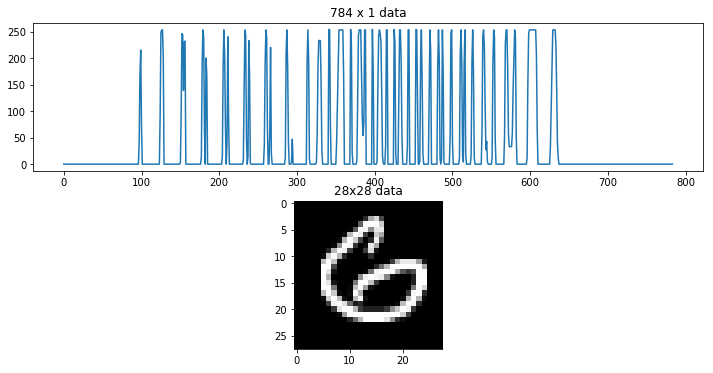

In [7]:
fig,ax = plt.subplots(2,1,figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784 x 1 data')
ax[1].imshow(x_train[0].reshape(28,28),cmap='gray')
ax[1].set_title('28x28 data')

In [8]:
x_train = x_train.reshape(-1,28,28,1)
x_val = x_val.reshape(-1,28,28,1)

In [9]:
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255

In [10]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [11]:
model = Sequential()

model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu',input_shape =(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1025,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [12]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                         height_shift_range = 0.1,
                         width_shift_range =0.1,
                         rotation_range=10)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=1e-4),metrics=["accuracy"])

In [14]:
annealer = LearningRateScheduler(lambda x: 1e-3 *0.9**x)

In [15]:
hist = model.fit_generator(datagen.flow(x_train,y_train,batch_size=16),
                           steps_per_epoch=500,
                           epochs=20,
                           verbose=2,
                           validation_data=(x_val[:400,:],y_val[:400,:]),
                           callbacks = [annealer])

Epoch 1/20
 - 42s - loss: 0.8224 - acc: 0.7389 - val_loss: 0.2099 - val_acc: 0.9475
Epoch 2/20
 - 42s - loss: 0.3531 - acc: 0.8949 - val_loss: 0.1281 - val_acc: 0.9675
Epoch 3/20
 - 43s - loss: 0.2487 - acc: 0.9248 - val_loss: 0.0649 - val_acc: 0.9850
Epoch 4/20
 - 41s - loss: 0.2088 - acc: 0.9369 - val_loss: 0.0939 - val_acc: 0.9650
Epoch 5/20
 - 42s - loss: 0.2048 - acc: 0.9400 - val_loss: 0.0677 - val_acc: 0.9900
Epoch 6/20
 - 44s - loss: 0.1705 - acc: 0.9508 - val_loss: 0.0465 - val_acc: 0.9925
Epoch 7/20
 - 48s - loss: 0.1602 - acc: 0.9539 - val_loss: 0.0612 - val_acc: 0.9825
Epoch 8/20
 - 42s - loss: 0.1384 - acc: 0.9606 - val_loss: 0.0617 - val_acc: 0.9875
Epoch 9/20
 - 42s - loss: 0.1183 - acc: 0.9660 - val_loss: 0.0511 - val_acc: 0.9925
Epoch 10/20
 - 43s - loss: 0.1181 - acc: 0.9666 - val_loss: 0.0427 - val_acc: 0.9925
Epoch 11/20
 - 41s - loss: 0.1114 - acc: 0.9655 - val_loss: 0.0377 - val_acc: 0.9925
Epoch 12/20
 - 41s - loss: 0.1060 - acc: 0.9694 - val_loss: 0.0367 - val_a

In [17]:
final_loss, final_acc =  model.evaluate(x_val,y_val,verbose=0)
print("final loss: {0:.4f}, final accuracy : {1:.4f}". format(final_loss,final_acc))

final loss: 0.0300, final accuracy : 0.9898


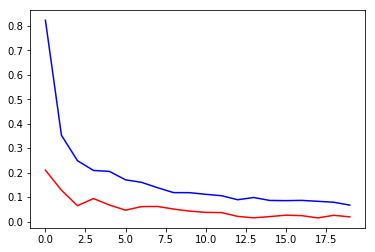

In [19]:
plt.plot(hist.history['loss'],color='b')
plt.plot(hist.history['val_loss'],color='r')
plt.show()

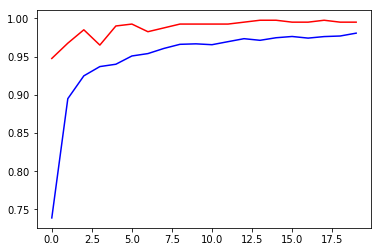

In [20]:
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [23]:
y_hat = model.predict(x_val)
y_pred =np.argmax(y_hat,axis=1)
y_true = np.argmax(y_val,axis=1)
cm= confusion_matrix(y_true,y_pred)
print(cm)

[[436   0   0   0   1   1   2   0   0   1]
 [  0 424   0   0   1   0   0   1   1   0]
 [  1   1 424   2   1   0   0   1   2   0]
 [  0   0   2 429   0   0   0   0   0   0]
 [  0   0   0   0 425   0   1   0   0   1]
 [  0   0   1   4   0 395   2   0   0   0]
 [  0   0   0   0   0   0 386   0   0   0]
 [  0   0   3   0   4   0   0 454   0   3]
 [  0   0   1   0   0   0   0   0 379   1]
 [  1   0   0   0   3   0   0   0   0 405]]


In [24]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255

In [25]:
y_hat = model.predict(x_test, batch_size=64)

In [26]:
y_pred = np.argmax(y_hat,axis=1)

In [ ]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))